In [1]:
import pandas as pd
#As --pylab is deprecated from newer builds of iPython so we need to import matplotlib inline to enable inline plotting in the IPython Notebook
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import math

In [2]:
#Create a dataframe
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#EDA for Time variable

In [5]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
3750.0      19
128860.0    19
140347.0    19
19912.0     19
143083.0    18
3766.0      17
39897.0     17
73885.0     17
3760.0      17
156037.0    17
3749.0      17
3755.0      16
3756.0      15
3747.0      15
3771.0      15
3754.0      15
19911.0     15
19913.0     15
3748.0      14
3763.0      14
142583.0    14
141741.0    14
19914.0     14
19910.0     14
43153.0     13
            ..
92530.0      1
92539.0      1
92603.0      1
92634.0      1
92633.0      1
92631.0      1
92629.0      1
92627.0      1
92625.0      1
92622.0      1
92620.0      1
92618.0      1
92609.0      1
92608.0      1
92604.0      1
92602.0      1
92540.0      1
92594.0      1
92590.0      1
92589.0      1
92572.0      1
92570.0      1
92568.0      1
92563.0      1
92561.0      1
92555.0      1
92554.0      1
92550.0      1
92548.0      1
86113.0      1
Name: Time, dtype: int64

In [6]:
df[df.Time.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


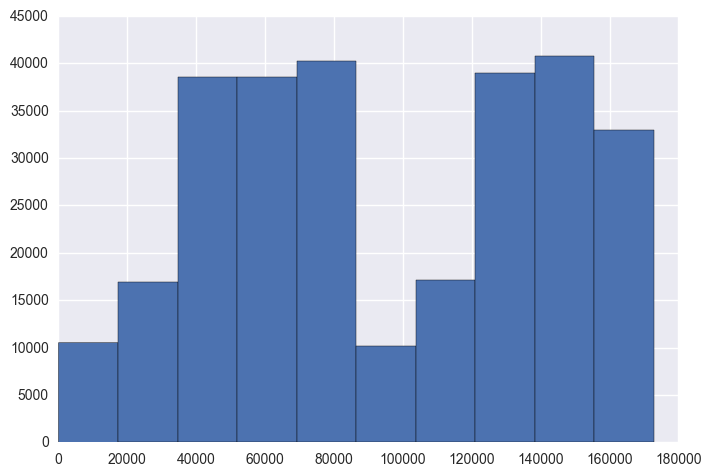

In [7]:
#Below is the histogram describing the distribution of the Time variable.
df.Time.hist()


#EDA for V1 variable

In [8]:
df.V1.value_counts()

 1.245674    77
 2.055797    77
 2.053311    62
 1.302378    60
 2.040211    53
 2.085175    48
 1.332849    45
 1.018412    40
 1.335053    39
-0.302521    36
 1.315404    36
 2.108108    35
 2.048629    30
 0.898614    28
 1.961343    27
 1.311258    27
 1.582101    26
 1.277616    25
 1.808886    25
 1.160957    24
 1.012595    24
 1.757259    24
 1.572441    23
 1.284475    23
 1.207099    21
 1.293053    21
 1.231961    21
 2.034997    21
 2.050734    20
 1.058605    19
             ..
 0.610194     1
-2.196306     1
 2.078941     1
 1.998877     1
 0.905730     1
-1.290303     1
-0.936801     1
-0.038628     1
-2.464875     1
 0.003994     1
-0.055437     1
-3.122807     1
-0.093023     1
 0.977216     1
 0.947433     1
-1.606137     1
-0.466765     1
-1.008706     1
-1.380914     1
 1.046941     1
 1.559744     1
 1.797994     1
 0.298029     1
-1.571933     1
 1.217343     1
 0.974246     1
-0.982422     1
-1.620522     1
-0.658649     1
 2.282529     1
Name: V1, dtype: int64

In [9]:
df[df.V1.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


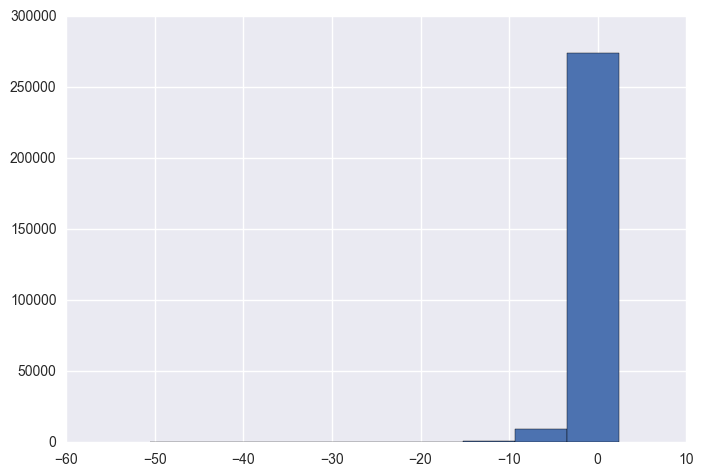

In [10]:
df.V1.hist()


#EDA for V2 variable

In [11]:
df.V2.value_counts()

 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
 0.393051    48
 0.389198    45
 1.036663    40
 0.331464    39
 0.447474    36
-0.033577    36
-0.207740    35
-0.367489    30
 0.033896    28
 0.075028    27
-0.715029    27
-1.197678    26
 0.008527    25
-0.699902    25
 0.185411    24
 1.265621    24
-0.023838    24
-1.213639    23
-0.528597    23
-0.434463    21
-0.300112    21
 0.457969    21
 0.273058    21
-0.364010    20
 0.368032    19
             ..
 0.135610     1
-0.002308     1
-1.275004     1
 0.699601     1
-0.805112     1
 1.568978     1
-0.341329     1
-1.234485     1
 0.706693     1
 0.499073     1
 0.188106     1
 5.143791     1
-6.455200     1
 0.248751     1
 1.297465     1
-0.225820     1
-0.705183     1
-7.268543     1
-0.215475     1
-0.032763     1
-1.090897     1
-0.783971     1
 0.945349     1
 4.864710     1
 0.335132     1
 0.416027     1
 0.356986     1
-0.483078     1
 0.208018     1
-0.979135     1
Name: V2, dtype: int64

In [12]:
df[df.V2.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


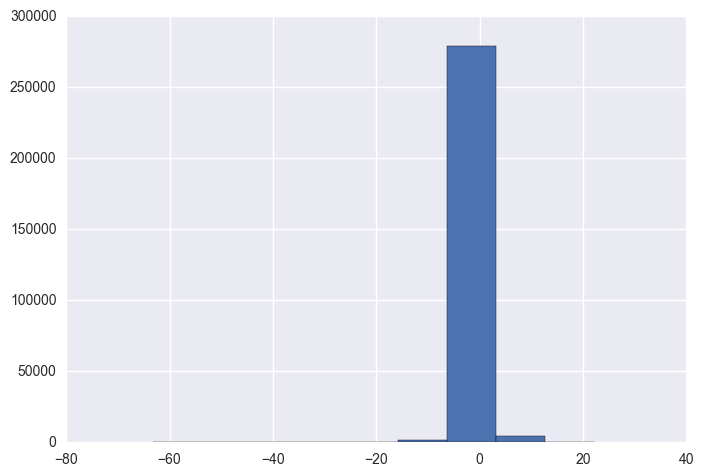

In [13]:
#Below is the histogram describing the distribution of the V2 variable.
df.V2.hist()

#EDA for V3 variable

In [14]:
df.V3.value_counts()

-2.752041    77
 0.488306    77
-1.681836    62
-0.681986    60
-2.955934    53
-4.508201    48
-2.165597    45
-1.689814    40
-2.057763    39
-0.495757    36
-1.089984    36
-3.386067    35
-2.544065    30
-0.083297    28
-1.703147    27
-1.292832    27
-1.147417    26
-1.154306    25
-1.411927    25
 1.857002    24
 0.944493    24
-1.576473    24
-0.551952    23
-1.153023    23
-0.353181    21
-0.311003    21
-1.940450    21
-3.848552    21
-2.542843    20
-2.571981    19
             ..
-1.221728     1
 0.259704     1
 1.460498     1
-1.179289     1
-0.251550     1
-2.501797     1
-0.234186     1
 1.420834     1
-0.515202     1
-1.109155     1
-1.017720     1
-0.481499     1
 0.885150     1
-1.586847     1
 1.054298     1
 0.541017     1
 2.062292     1
-1.020963     1
 1.646810     1
-1.302518     1
 0.259335     1
 0.223503     1
 0.610960     1
 2.520586     1
-0.851642     1
-1.251235     1
-1.383608     1
 1.768274     1
 1.212012     1
 0.132908     1
Name: V3, dtype: int64

In [15]:
df[df.V3.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


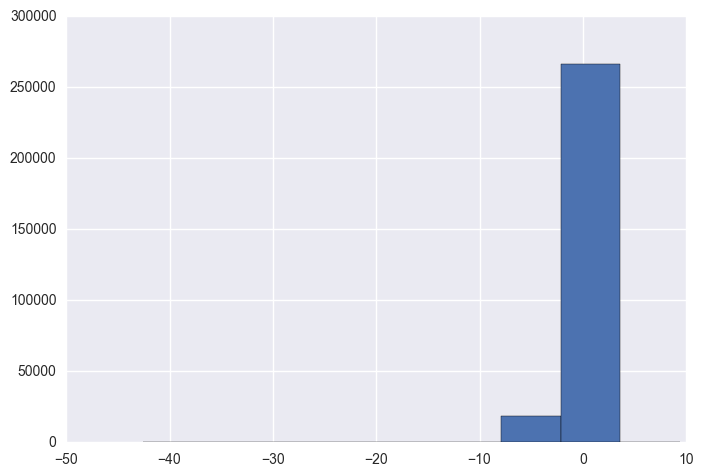

In [16]:
#Below is the histogram describing the distribution of the V3 variable.
df.V3.hist()

#EDA for V4 variable

In [17]:
df.V4.value_counts()

-0.842316    77
 0.635322    77
 0.454212    62
-1.904603    60
-0.578356    53
-0.311771    48
-0.306873    45
 1.315476    40
-0.346175    39
-0.557087    36
-3.214799    36
-0.720760    35
-0.728472    30
 1.256326    28
-0.483154    27
-0.613582    27
-2.504297    26
 0.258949    25
-0.101256    25
 2.625675    24
 3.773188    24
 1.472988    24
-1.692217    23
-2.500236    23
-0.312596    21
 0.173149    21
 0.164989    21
-0.366534    21
-0.729357    20
 0.049894    19
             ..
 0.457005     1
-1.248095     1
 1.446163     1
 2.403394     1
 1.812645     1
 1.118204     1
 0.997225     1
 1.037391     1
 1.132497     1
 0.426481     1
 0.865062     1
-0.490998     1
-0.924940     1
-0.378566     1
 0.325261     1
-0.515186     1
-2.436356     1
 0.377104     1
 1.115528     1
-0.630815     1
 0.063318     1
-1.023294     1
-0.773098     1
-1.816070     1
-1.731668     1
-0.762817     1
 2.762322     1
 3.896433     1
-1.009797     1
 1.243767     1
Name: V4, dtype: int64

In [18]:
df[df.V4.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


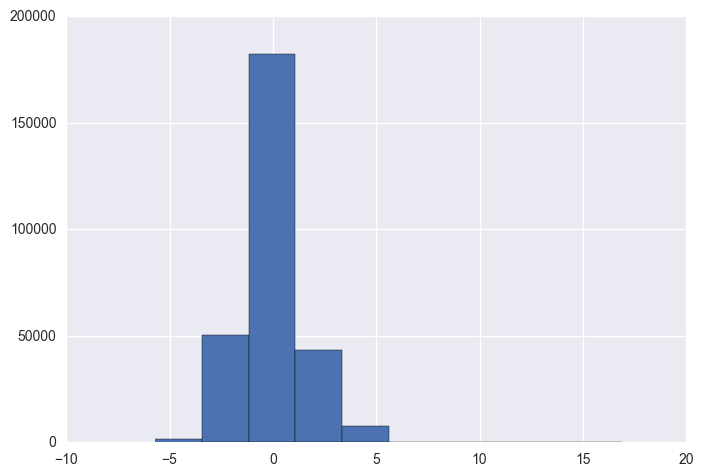

In [19]:
#Below is the histogram describing the distribution of the V4 variable.
df.V4.hist()

#EDA for V5 variable

In [20]:
df.V5.value_counts()

 2.463072    77
-0.562777    77
 0.298310    62
 1.326623    60
 2.609358    53
 3.510117    48
 2.641351    45
 1.698436    40
 2.583234    39
 2.705041    36
 2.029931    36
 2.905339    35
 2.387380    30
 0.554091    28
 1.713865    27
 2.139257    27
 0.984772    26
 2.193753    25
 0.479882    25
 1.162173    24
-0.813686    24
-0.820666    24
 1.390419    23
 0.979841    23
 3.059679    21
 2.609570    21
 1.543265    21
 1.433186    21
 2.388455    20
 1.009978    19
             ..
-1.694648     1
 0.985523     1
 1.231060     1
 0.436427     1
 0.455579     1
-0.490884     1
-2.459628     1
-0.292363     1
-0.472901     1
-0.466818     1
 0.548944     1
 0.655741     1
 1.791811     1
-0.968122     1
-0.190765     1
 1.171719     1
-0.256222     1
 1.419023     1
 1.511586     1
 1.907128     1
-0.865163     1
 0.740528     1
 0.316244     1
-1.438522     1
 0.898230     1
-0.355329     1
 0.116403     1
-0.948693     1
 0.202988     1
 0.694324     1
Name: V5, dtype: int64

In [21]:
df[df.V5.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


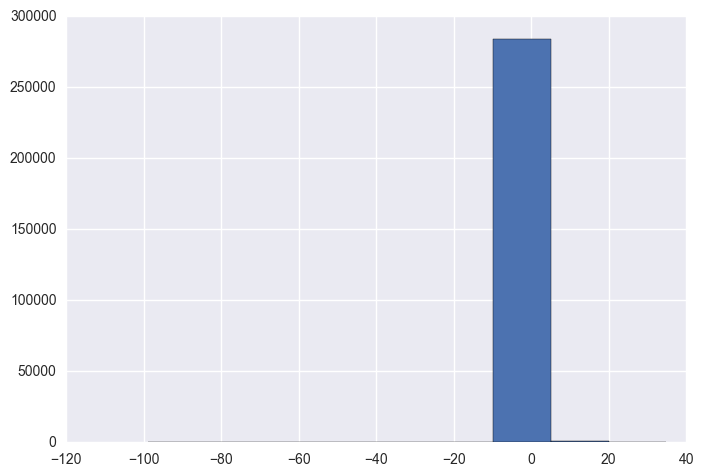

In [22]:
#Below is the histogram describing the distribution of the V5 variable.
df.V5.hist()

#EDA for V6 variable

In [23]:
df.V6.value_counts()

 3.173856    77
-1.011073    77
-0.953526    62
 3.436312    60
 3.142642    53
 2.453299    48
 2.808084    45
 0.528807    40
 2.854102    39
 3.268130    36
 2.762440    36
 2.932171    35
 3.318407    30
 0.702342    28
 3.181564    27
 3.913136    27
 3.234035    26
 1.049000    25
 3.604186    25
-1.013532    24
 0.741198    24
 0.855771    24
 3.487251    23
 3.235834    23
 3.014117    21
 4.058650    21
 2.719602    21
 3.956628    21
 3.318015    20
-1.100573    19
             ..
 0.836764     1
-0.506258     1
-0.200398     1
 0.990116     1
-0.456059     1
 0.080197     1
 1.582139     1
-0.482222     1
-0.619368     1
 0.154667     1
-0.177575     1
 0.080933     1
-0.579159     1
-0.341216     1
-0.004124     1
 3.177361     1
 0.375071     1
-0.431140     1
 1.237389     1
-0.240279     1
 1.113270     1
-1.077613     1
 1.471122     1
-1.249426     1
-0.895922     1
 0.257922     1
-1.919686     1
-0.064622     1
 3.032769     1
 0.132318     1
Name: V6, dtype: int64

In [24]:
df[df.V6.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


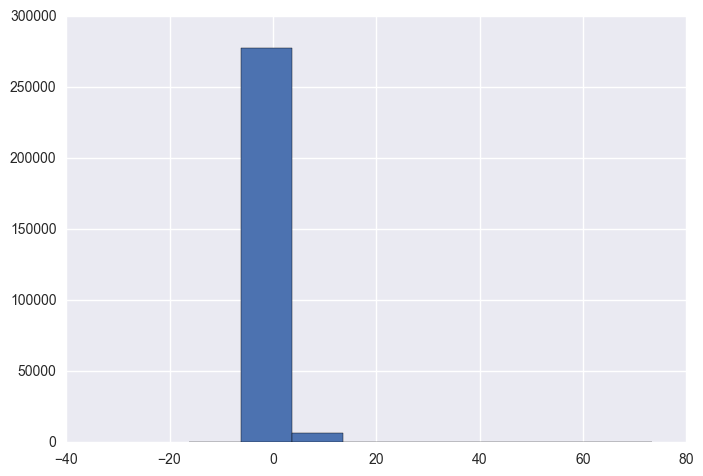

In [25]:
#Below is the histogram describing the distribution of the V6 variable.
df.V6.hist()

#EDA for V7 variable

In [26]:
df.V7.value_counts()

-0.432126    77
 0.014953    77
 0.152003    62
-1.145127    60
-0.416883    53
 0.220469    48
-0.171627    45
 0.331715    40
-0.187547    39
 0.593847    36
-0.534994    36
 0.054796    35
-0.477692    30
 0.155668    28
-0.505045    27
-1.252671    27
-1.492196    26
-0.329081    25
-0.448926    25
-1.165241    24
 0.658133    24
-1.050510    24
-1.223489    23
-1.485561    23
-1.140805    21
-1.201919    21
-0.269415    21
-0.286079    21
-0.479138    20
-1.582540    19
             ..
 1.790461     1
 1.780774     1
-0.606811     1
 0.931857     1
 1.070318     1
 0.146582     1
 0.025034     1
 0.398051     1
 1.039199     1
-0.292619     1
-0.313499     1
-0.667935     1
 1.369891     1
-0.059453     1
-0.648430     1
 2.310142     1
-0.689155     1
 0.688532     1
 2.760181     1
 0.976014     1
 0.278629     1
-0.761156     1
-1.551378     1
 0.216467     1
 0.197451     1
 0.432529     1
 0.724806     1
 0.143201     1
 0.882215     1
-0.010619     1
Name: V7, dtype: int64

In [27]:
df[df.V7.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


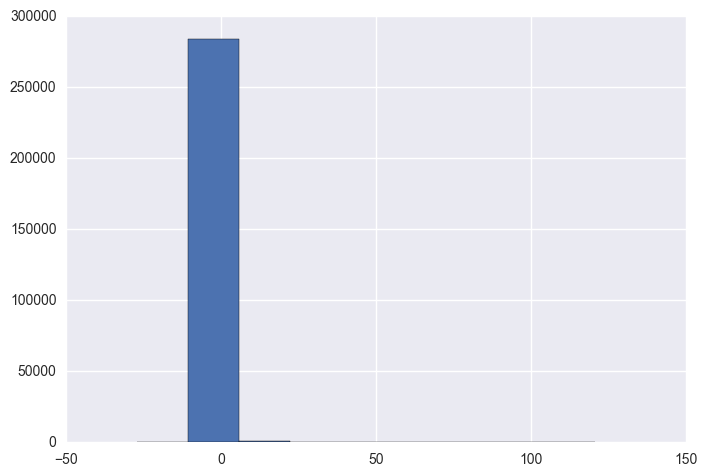

In [28]:
#Below is the histogram describing the distribution of the V7 variable.
df.V7.hist()

#EDA for V8 variable

In [29]:
df.V8.value_counts()

 0.727706    77
-0.160211    77
-0.207071    62
 0.959147    60
 0.784393    53
 0.543377    48
 0.683352    45
 0.364539    40
 0.685154    39
 0.808250    36
 0.556451    36
 0.562129    35
 0.791276    30
 0.196360    28
 1.054911    27
 0.804860    27
 0.747692    26
 0.851078    25
 0.385855    25
 0.483432    24
 0.411449    24
-0.152624    24
 0.875786    23
 0.746395    23
 0.754420    21
 1.071643    21
 1.090853    21
 0.714514    21
 0.791559    20
-0.487201    19
             ..
-0.528863     1
-0.184582     1
 0.681746     1
-0.384186     1
 1.430543     1
 0.287545     1
-0.384876     1
 1.925229     1
 1.284679     1
-1.082952     1
 0.075961     1
-0.003144     1
 0.688928     1
-0.286562     1
 1.073623     1
 0.267242     1
-0.235312     1
-0.253653     1
-0.164712     1
 0.168644     1
 1.134136     1
-0.446834     1
-0.231901     1
 0.330915     1
-0.141522     1
 0.849225     1
 0.116504     1
 0.163141     1
 0.187568     1
-0.283617     1
Name: V8, dtype: int64

In [30]:
df[df.V8.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


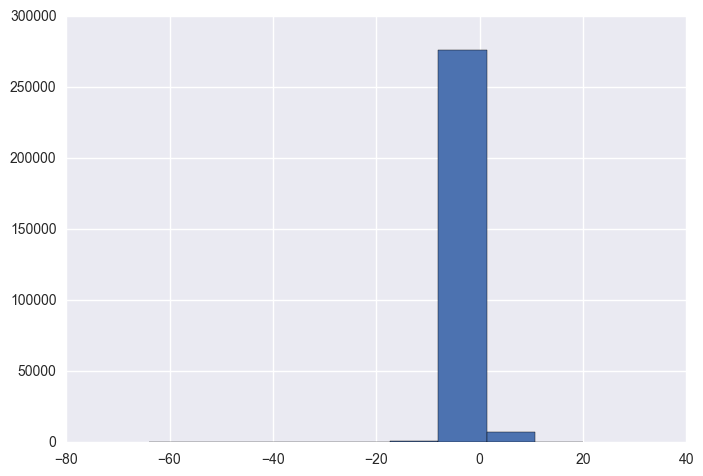

In [31]:
#Below is the histogram describing the distribution of the V8 variable.
df.V8.hist()

#EDA for V9 variable

In [32]:
df.V9.value_counts()

 0.608606    77
 0.170362    77
 0.587335    62
 1.671302    60
 0.359902    53
-0.100434    48
-0.297962    45
-0.711798    40
-0.286614    39
-0.052724    36
 0.697720    36
 0.017654    35
 0.403246    30
 1.160759    28
-0.074071    27
 1.314417    27
-1.984488    26
 0.173330    25
 1.046042    25
 1.078229    24
-0.100729    24
-0.847326    24
 2.954982    23
-1.985077    23
-0.221009    21
 0.369413    21
 0.761328    21
 0.797960    21
 0.403374    20
 0.256297    19
             ..
-0.236100     1
 0.926262     1
-0.356548     1
 1.297737     1
 0.130197     1
 0.199759     1
-1.031662     1
-0.028980     1
 0.116660     1
 1.120050     1
-0.433317     1
 0.209877     1
-1.002563     1
 0.954988     1
-0.071078     1
 1.016298     1
-0.491294     1
 0.307551     1
 1.465021     1
-0.988623     1
 1.044470     1
 2.143730     1
 0.545514     1
 0.954288     1
 0.262395     1
 0.394461     1
 1.038459     1
-0.196000     1
-0.091786     1
 0.584809     1
Name: V9, dtype: int64

In [33]:
df[df.V9.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


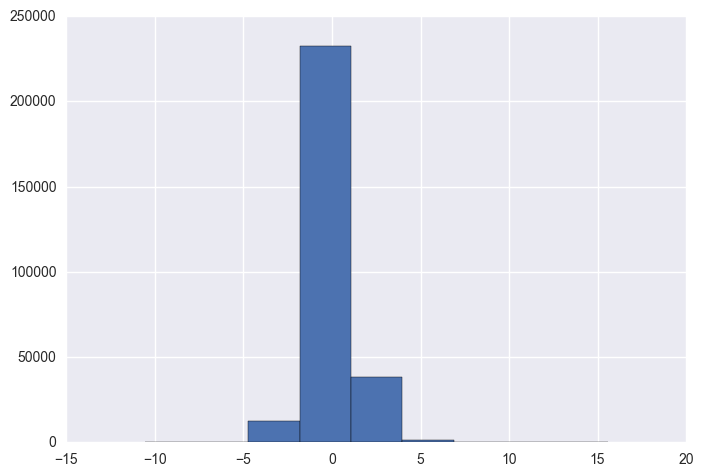

In [34]:
#Below is the histogram describing the distribution of the V9 variable.
df.V9.hist()

#EDA for V10 variable

In [35]:
df.V10.value_counts()

-0.075186    77
-0.044575    77
-0.362047    62
-1.022946    60
-0.351075    53
-1.018622    48
-0.652097    45
-1.570288    40
-0.535903    39
 0.001149    36
-1.090181    36
 0.190507    35
 0.092725    30
-0.518259    28
-0.217426    27
-0.149156    27
 1.501536    26
-0.014826    25
-0.162235    25
 1.532903    24
 0.410744    24
-1.452499    24
-1.398574    23
 1.499207    23
-0.620800    21
-1.179783    21
-0.181066    21
-0.141319    21
 0.093232    20
 0.230262    19
             ..
 0.253945     1
-0.636960     1
 1.355062     1
 0.199875     1
-0.549029     1
 0.418870     1
-0.284528     1
-0.974681     1
 0.018671     1
-1.337353     1
-0.563306     1
 0.145990     1
 0.105169     1
-0.279226     1
 0.252481     1
-0.465145     1
-0.586356     1
 0.689123     1
-0.496911     1
 1.360539     1
 0.901684     1
 0.749576     1
-2.845288     1
 0.515433     1
-0.220382     1
-0.430573     1
-0.094431     1
 0.188580     1
-0.469744     1
-0.764271     1
Name: V10, dtype: int64

In [36]:
df[df.V10.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


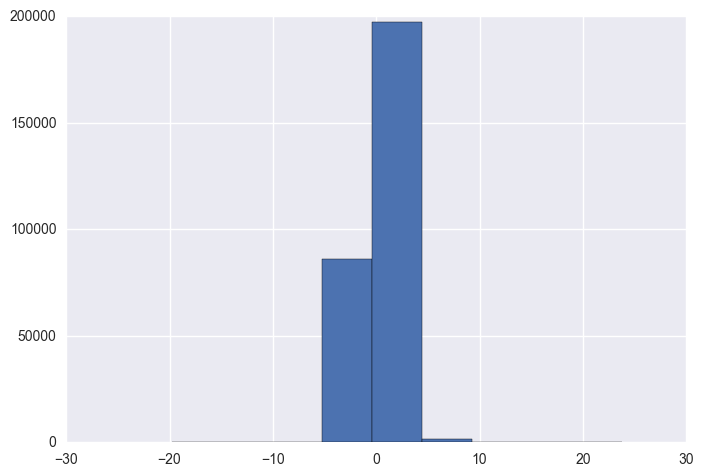

In [37]:
#Below is the histogram describing the distribution of the V10 variable.
df.V10.hist()

#EDA for V11 variable

In [38]:
df.V11.value_counts()

 0.063504    77
-0.356749    77
-0.589598    62
-0.191423    60
 0.329651    53
 0.807038    48
 0.418003    45
 3.463018    40
 0.332848    39
-0.028609    36
-0.111088    36
-0.079089    35
 0.004406    30
 1.606342    28
 0.131576    27
-0.222887    27
-0.242807    26
-0.542440    25
 0.610353    25
 0.330622    24
 2.893923    24
 2.237912    24
-0.242736    23
 0.756287    23
 0.348748    21
 0.942825    21
-0.565554    21
-0.505376    21
 0.004391    20
-0.076722    19
             ..
-1.048370     1
 0.787995     1
 0.057217     1
 0.336733     1
-0.028774     1
-0.296676     1
 1.197928     1
-0.761420     1
-0.844820     1
-0.123522     1
-1.392971     1
 0.107195     1
-0.902998     1
-0.744301     1
-0.233232     1
 0.280479     1
-1.560881     1
-0.370718     1
 0.702753     1
 2.040904     1
 0.982304     1
 1.324987     1
-0.580245     1
-0.457039     1
 1.742560     1
-1.331899     1
-1.710263     1
 0.375825     1
 1.334596     1
-0.323906     1
Name: V11, dtype: int64

In [39]:
df[df.V11.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


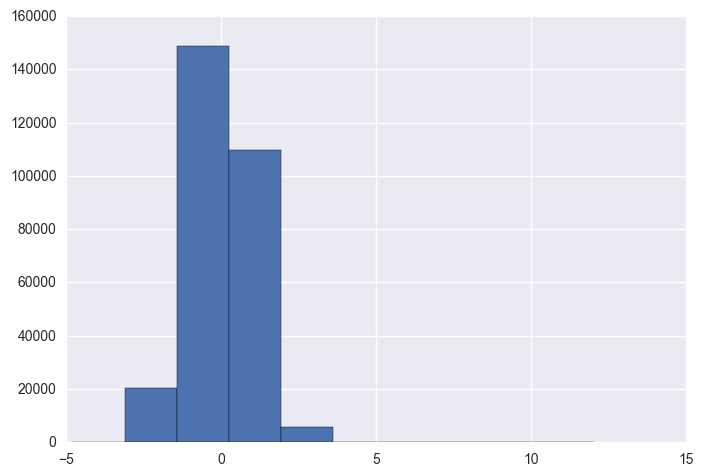

In [40]:
#Below is the histogram describing the distribution of the V11 variable.
df.V11.hist()

#EDA for V12 variable

In [41]:
df.V12.value_counts()

 0.350564    77
-0.073460    77
-0.174712    62
 0.631027    60
 0.183508    53
-0.330548    48
-0.322437    45
 0.538411    40
-0.268319    39
 0.062652    36
 0.073657    36
 0.232614    35
 0.390211    30
-2.525493    28
 0.496715    27
-0.028146    27
-1.027152    26
 0.665157    25
 0.235824    25
 0.084458    24
-2.310506    24
 0.774149    24
-1.026946    23
-1.875448    23
 0.268831    21
-0.277846    21
-0.296105    21
 0.302143    21
 0.390166    20
 1.150858    19
             ..
 1.566896     1
-0.700235     1
-2.669497     1
 0.041845     1
 0.401373     1
-1.316498     1
 0.898092     1
-0.734911     1
-0.660778     1
-0.624932     1
 1.037572     1
-0.118356     1
-0.517022     1
 0.218325     1
-1.024959     1
-0.945762     1
-0.223547     1
-0.307407     1
 0.343657     1
 0.121398     1
-0.692263     1
 0.946548     1
-0.669031     1
-3.451509     1
-0.733943     1
 0.116303     1
-0.049704     1
 0.677151     1
 0.854326     1
-1.605069     1
Name: V12, dtype: int64

In [42]:
df[df.V12.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


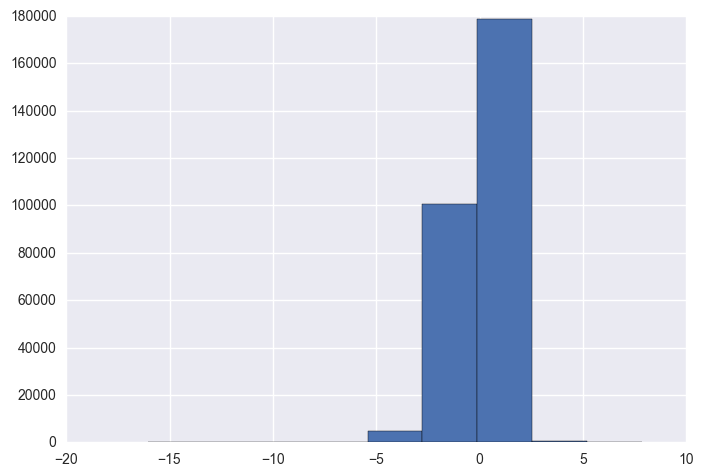

In [43]:
#Below is the histogram describing the distribution of the V12 variable.
df.V12.hist()

#EDA for V13 variable

In [44]:
df.V13.value_counts()

-0.141238    77
-0.517760    77
-0.621127    62
 0.031907    60
-0.272919    53
-0.531419    48
-0.143469    45
-0.378095    40
-0.127614    39
 0.041285    36
-0.238457    36
-0.366430    35
-0.212361    30
 0.166047    28
 0.011460    27
-0.050893    27
 0.498296    26
-1.324326    25
-0.224138    25
 0.663506    24
 0.771152    24
-0.698885    24
 1.673656    23
 0.499188    23
-0.024932    21
 0.001655    21
-0.118736    21
-0.294708    21
-0.212555    20
-0.334758    19
             ..
-0.643073     1
-0.804243     1
-1.039765     1
 0.572591     1
 0.535356     1
-0.326397     1
-0.336374     1
 0.658884     1
-0.409218     1
 1.938644     1
-0.822447     1
 0.004567     1
 0.503096     1
 0.603251     1
-0.098322     1
-1.247890     1
 2.138468     1
-0.210528     1
 0.335355     1
 0.762795     1
 0.652682     1
-0.991114     1
-0.513445     1
-0.687236     1
-0.523678     1
-1.550786     1
 0.890840     1
-0.854364     1
 0.208866     1
 1.389540     1
Name: V13, dtype: int64

In [45]:
df[df.V13.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


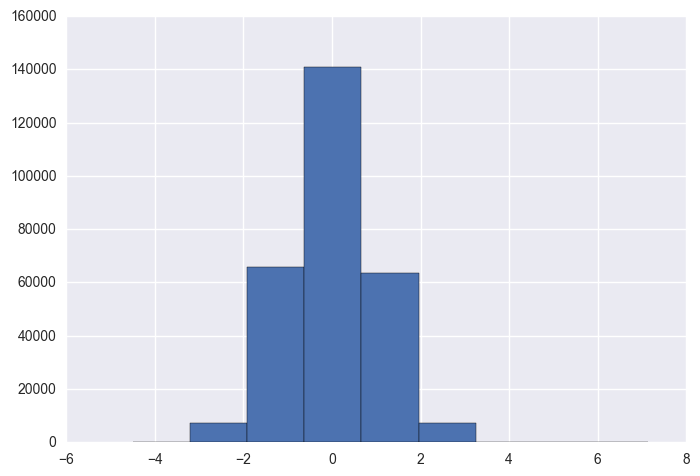

In [46]:
#Below is the histogram describing the distribution of the V13 variable.
df.V13.hist()

#EDA for V14

In [47]:
df.V14.value_counts()

 0.690972    77
 0.406969    77
-0.703513    62
-0.031425    60
-0.597437    53
-2.181449    48
-1.154524    45
-3.045495    40
-0.868300    39
 0.215738    36
 0.425500    36
 0.797040    35
 0.495790    30
 2.428012    28
-0.112921    27
 0.000388    27
-0.176644    26
 0.591344    25
 0.189807    25
-0.117093    24
 1.647488    24
-3.333721    24
-0.175512    23
 1.405684    23
-0.266008    21
-0.216030    21
-1.192582    21
-2.314497    21
 0.495544    20
 1.312529    19
             ..
-0.573974     1
 0.063474     1
 0.574316     1
-0.596581     1
 0.572122     1
-0.042709     1
 0.124173     1
 1.102617     1
 0.429870     1
-0.208848     1
-0.686857     1
 0.194853     1
 0.875656     1
 0.019729     1
 0.333244     1
 0.615269     1
 0.146398     1
-1.626522     1
 1.093676     1
-0.236903     1
-0.271393     1
 0.308852     1
-0.196313     1
 0.133683     1
 0.185951     1
-0.549919     1
-0.379652     1
 0.540457     1
 0.711046     1
-0.056341     1
Name: V14, dtype: int64

In [48]:
df[df.V14.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


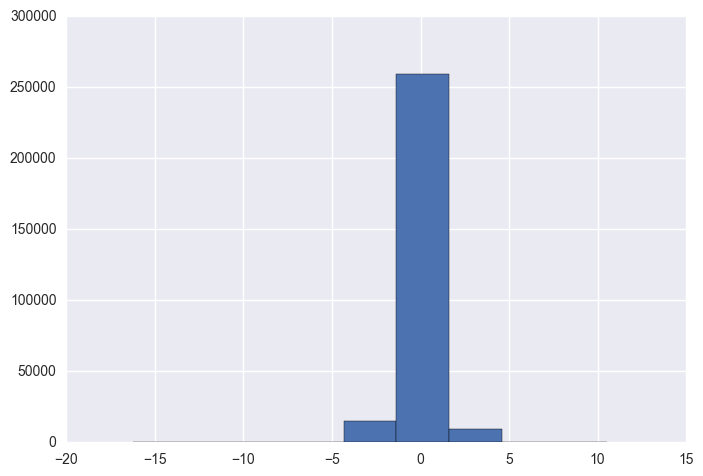

In [49]:
#Below is the histogram describing the distribution of the V14 variable.
df.V14.hist()

#EDA for V15

In [50]:
df.V15.value_counts()

 1.275257    77
 1.124147    77
 0.271957    62
 1.446627    60
 0.583897    53
 0.388724    48
 1.157634    45
 1.468911    40
 1.128539    39
 1.245277    36
 1.069356    36
 0.085960    35
 0.472770    30
 1.169788    28
 1.300007    27
 0.894313    27
 0.749327    26
-0.152090    25
-0.035198    25
 0.523298    24
 0.005918    24
-0.586137    24
 0.710533    23
 0.749956    23
 0.387423    21
 1.278393    21
 1.502697    21
 0.367331    21
 0.472633    20
 0.016836    19
             ..
 1.062059     1
-0.556489     1
 1.064157     1
 0.726835     1
-0.477282     1
 0.903572     1
-0.293437     1
-0.056471     1
-0.886853     1
-1.025944     1
-0.995489     1
-0.622490     1
 0.259081     1
 0.354333     1
-1.163506     1
-0.441963     1
-0.025320     1
 0.772714     1
 1.137799     1
-0.026001     1
 0.258923     1
 2.173083     1
 0.808144     1
 1.329473     1
 3.449594     1
-0.121352     1
-0.211208     1
 0.522101     1
 0.950363     1
-0.543954     1
Name: V15, dtype: int64

In [51]:
df[df.V15.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


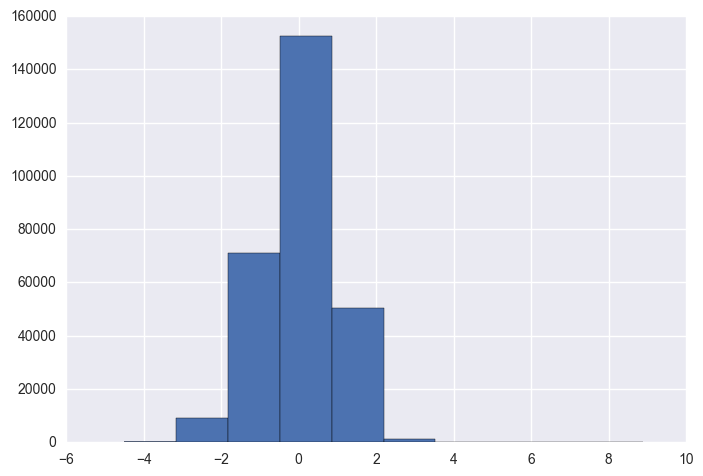

In [52]:
#Below is the histogram describing the distribution of the V15 variable.
df.V15.hist()

#EDA for V16 variable

In [53]:
df.V16.value_counts()

 0.342470    77
-0.371962    77
 0.318688    62
-0.121820    60
 0.178676    53
 0.232071    48
 0.878175    45
-0.029742    40
 0.786506    39
-0.255231    36
 0.640368    36
-0.721847    35
-0.171451    30
-1.532341    28
 0.812807    27
 0.001023    27
-0.077729    26
-0.102275    25
-0.941152    25
 0.897811    24
 1.168256    24
 1.835846    24
-0.149641    23
-0.077069    23
 0.404881    21
 0.489388    21
 0.704778    21
 0.923268    21
-0.171595    20
 1.802742    19
             ..
 0.179431     1
-0.282180     1
-0.953582     1
 0.112812     1
 0.232553     1
-0.941375     1
-1.032893     1
-0.339213     1
 1.455609     1
-1.345654     1
-1.108016     1
 1.721138     1
-0.916908     1
-0.595487     1
-2.171318     1
-2.075106     1
-2.365290     1
 2.343112     1
-0.843223     1
 0.517785     1
 0.226528     1
-0.096097     1
-0.457965     1
-0.367184     1
-0.086074     1
-1.244063     1
 0.531382     1
 1.328144     1
-0.482460     1
 0.338048     1
Name: V16, dtype: int64

In [54]:
df[df.V16.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


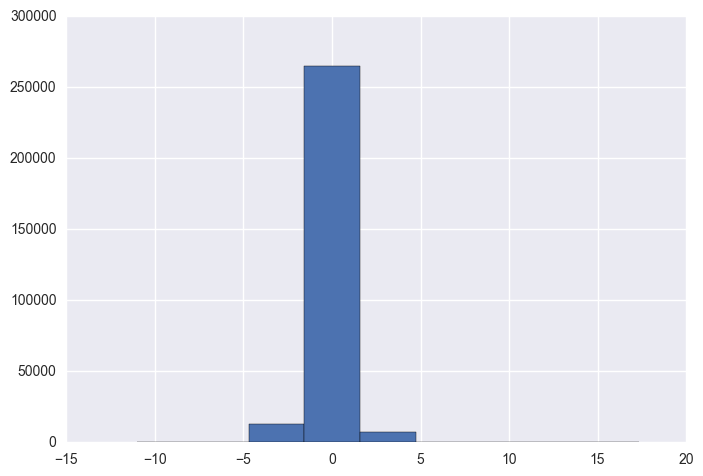

In [55]:
#Below is the histogram describing the distribution of the V16 variable.
df.V16.hist()

#EDA for V17 variable

In [56]:
df.V17.value_counts()

-0.374656    77
-0.601957    77
 0.549365    62
-0.651405    60
 0.473898    53
 2.125022    48
 0.536918    45
 3.664588    40
 0.316435    39
-0.910237    36
-1.072085    36
-0.169346    35
-0.368228    30
 1.822234    28
-0.583562    27
-0.495483    27
 0.006205    26
-0.511052    25
 0.316977    25
 2.682613    24
-1.285736    24
-0.044722    24
 0.006353    23
 0.081231    23
-0.674259    21
 1.689419    21
 0.395379    21
-0.747097    21
-0.368261    20
 0.488156    19
             ..
-0.270103     1
 1.510346     1
 0.678006     1
-0.288037     1
 0.305487     1
-1.141964     1
-0.089002     1
 0.644587     1
-0.067419     1
-0.400152     1
-0.341704     1
 1.570816     1
-0.519196     1
-0.088657     1
-0.066328     1
 4.402305     1
-0.474746     1
 1.847766     1
 0.351641     1
 1.374868     1
 0.805436     1
 0.639552     1
-0.101345     1
 0.091931     1
-0.235523     1
-0.997660     1
 0.195705     1
 1.664577     1
 0.055250     1
 0.298635     1
Name: V17, dtype: int64

In [57]:
df[df.V17.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


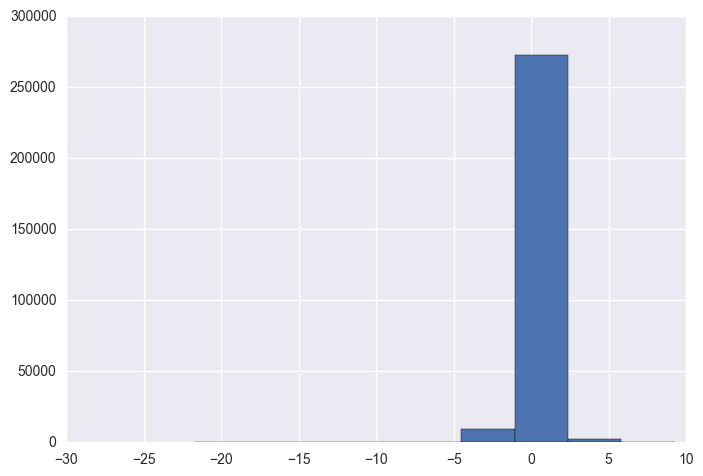

In [58]:
#Below is the histogram describing the distribution of the V17 variable.
df.V17.hist()

#EDA for V18 variable

In [59]:
df.V18.value_counts()

-0.438992    77
-0.052640    77
-0.257786    62
 0.617970    60
-0.498850    53
 0.405549    48
 0.712873    45
-0.105190    40
 0.587856    39
-0.068698    36
 0.485110    36
-0.895393    35
-0.976348    30
-1.963373    28
 0.075188    27
 0.166473    27
 0.396657    26
-0.077844    25
-1.139175    25
 1.269314    24
 0.838389    24
 0.880416    24
 0.397682    23
 0.893577    23
 0.383998    21
 0.209296    21
 1.039038    21
 1.163240    21
-0.976572    20
 0.370515    19
             ..
 0.597459     1
-0.058832     1
 0.217778     1
-0.132044     1
 0.344247     1
-0.316348     1
-0.495633     1
-0.072443     1
 0.062850     1
-0.181692     1
-0.047444     1
-0.262986     1
 0.526782     1
-0.220860     1
-0.130606     1
-0.534358     1
 0.047469     1
-0.081232     1
 1.617576     1
 1.539123     1
-0.337469     1
 0.302215     1
 0.474785     1
 0.427680     1
-0.030550     1
-1.922926     1
-1.053939     1
-1.414804     1
-0.374663     1
-0.465781     1
Name: V18, dtype: int64

In [60]:
df[df.V18.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


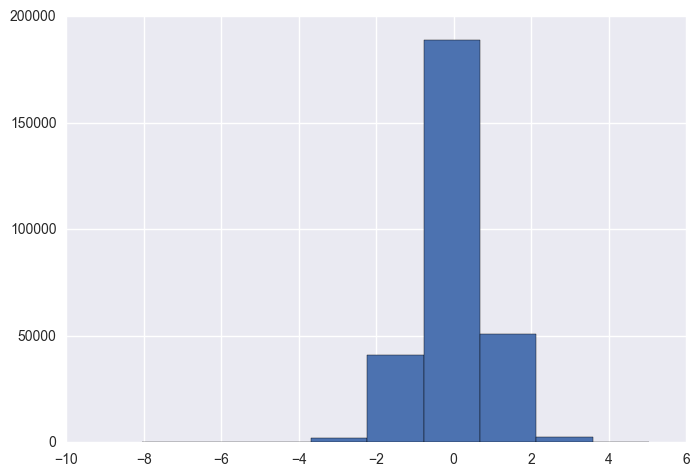

In [61]:
#Below is the histogram describing the distribution of the V18 variable.
df.V18.hist()

#EDA for V19 variable

In [62]:
df.V19.value_counts()

-0.116091    77
-0.330590    77
 0.016256    62
 0.927600    60
-0.140099    53
-0.440930    48
 0.006774    45
-2.097944    40
 0.049350    39
 0.271315    36
 0.255268    36
 0.002128    35
 0.022521    30
-2.149185    28
 0.175176    27
-0.358386    27
 0.128687    26
-0.195140    25
 0.365934    25
-0.912262    24
-1.798001    24
-1.766324    24
 0.127090    23
 0.720911    23
 0.331169    21
 0.160886    21
-0.252924    21
-0.821972    21
 0.022869    20
-0.485983    19
             ..
 0.090306     1
 0.036735     1
 0.017174     1
-0.191603     1
 0.424335     1
 0.226811     1
-0.274017     1
 0.244699     1
 0.949301     1
-0.405389     1
-0.502220     1
-0.447129     1
 0.298262     1
 0.454452     1
 0.585689     1
-1.219015     1
-1.137938     1
-0.744571     1
-1.189013     1
 0.922244     1
 0.402524     1
 0.270191     1
-0.176032     1
 0.395077     1
-1.438572     1
-1.387282     1
-0.406596     1
-0.572094     1
 0.010875     1
 1.005098     1
Name: V19, dtype: int64

In [63]:
df[df.V19.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


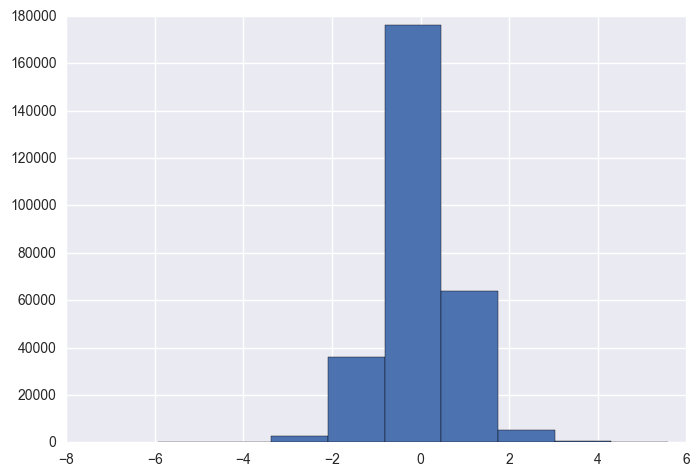

In [64]:
#Below is the histogram describing the distribution of the V19 variable.
df.V19.hist()

#EDA for V20 variable

In [65]:
df.V20.value_counts()

-0.132080    77
-0.180370    77
-0.187421    62
 0.005757    60
-0.120714    53
-0.086989    48
 0.053607    45
-0.167555    40
 0.045217    39
 0.156089    36
 0.016952    36
-0.174293    35
-0.152758    30
-0.252497    28
-0.143399    27
 0.032734    27
-0.208870    26
-0.272403    25
-0.053851    25
-0.300175    24
-0.240469    24
 0.002466    24
-0.198687    23
-0.015415    23
 0.025020    21
-0.082371    21
 0.028835    21
-0.009647    21
-0.154978    20
 0.078229    19
             ..
-1.719902     1
-0.097105     1
 0.136326     1
-0.240943     1
-0.051257     1
 0.800330     1
 0.721693     1
-0.130991     1
-0.114228     1
 0.000085     1
-0.362092     1
 0.891250     1
 0.049504     1
-0.149571     1
-0.123439     1
 0.913471     1
-0.023864     1
-0.175267     1
 0.138963     1
 0.052629     1
-0.193182     1
-0.158803     1
-0.267980     1
-0.197595     1
 0.174225     1
 0.101744     1
-0.004763     1
-0.163831     1
-1.916053     1
-0.279237     1
Name: V20, dtype: int64

In [66]:
df[df.V20.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


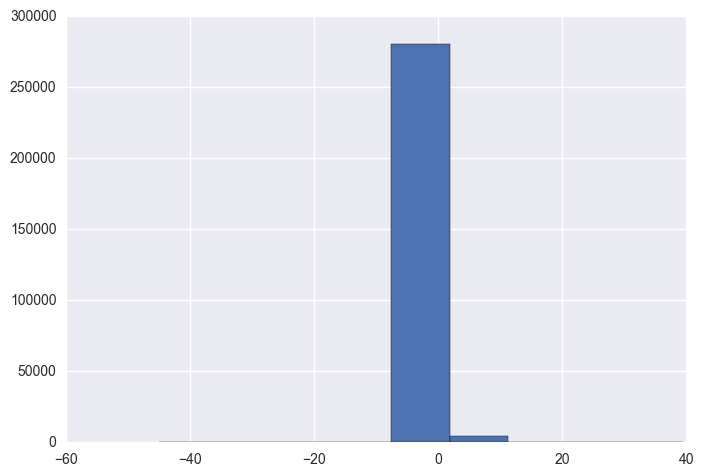

In [67]:
#Below is the histogram describing the distribution of the V20 variable.
df.V20.hist()

#EDA for V21 variable

In [68]:
df.V21.value_counts()

 0.269765    77
-0.262581    77
-0.361158    62
-0.064208    60
-0.352334    53
-0.067217    48
-0.207432    45
-0.040238    40
-0.191820    39
 0.007343    36
-0.313307    36
 0.095248    35
-0.292703    30
 0.031511    28
-0.342676    27
 0.191787    27
-0.269321    26
-0.187916    25
-0.055587    25
-0.120365    24
 0.167722    24
 0.281617    24
-0.208136    23
-0.266291    23
 0.093951    21
-0.143435    21
-0.121126    21
-0.115422    21
-0.293363    20
 0.337116    19
             ..
-0.238153     1
-0.072249     1
 0.934067     1
-0.856176     1
 0.004684     1
-0.149050     1
 0.104330     1
 0.554411     1
 1.049994     1
-0.090212     1
-0.104233     1
-0.091535     1
 0.179922     1
 0.286313     1
-0.043255     1
-0.644869     1
-0.082148     1
 0.430222     1
 0.021499     1
 0.463049     1
-0.094359     1
 0.032780     1
 1.695489     1
-0.305002     1
 0.464088     1
-0.062567     1
 0.241890     1
-1.286068     1
-1.051884     1
-0.031259     1
Name: V21, dtype: int64

In [69]:
df[df.V21.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


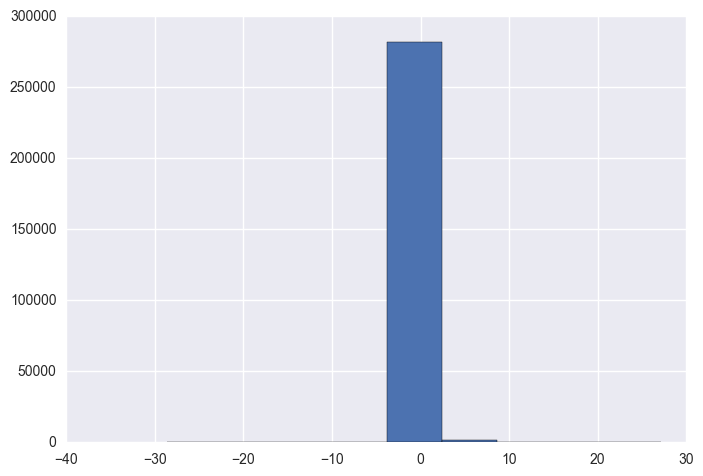

In [70]:
#Below is the histogram describing the distribution of the V21 variable.
df.V21.hist()

#EDA for V22 variable

In [71]:
df.V22.value_counts()

 0.844627    77
-0.816264    77
-0.984262    62
-0.080587    60
-0.996937    53
-0.072642    48
-0.692417    45
 0.096172    40
-0.650118    39
-1.068934    36
 0.250886    36
 0.367526    35
-0.835377    30
 0.278743    28
-1.148504    27
 0.691780    27
-0.522610    26
-0.008416    25
-0.476908    25
 0.665253    24
-0.204997    24
 0.811455    24
-0.525249    23
-0.272552    23
-0.427753    21
 0.349181    21
-0.279335    21
-0.376046    21
-0.834802    20
 0.752714    19
             ..
-0.910262     1
-0.580573     1
-0.404558     1
-0.220659     1
 0.664448     1
 0.806867     1
 0.379335     1
-1.319790     1
 0.175763     1
-0.185319     1
 1.018884     1
 0.116319     1
 0.485985     1
 0.169213     1
 0.438896     1
 0.217381     1
 0.850478     1
 1.252321     1
 1.024817     1
 0.379889     1
-1.323267     1
-0.867303     1
 1.074033     1
 0.241290     1
 1.007743     1
 0.525970     1
-0.535192     1
-0.594536     1
-0.193970     1
-0.244297     1
Name: V22, dtype: int64

In [72]:
df[df.V22.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


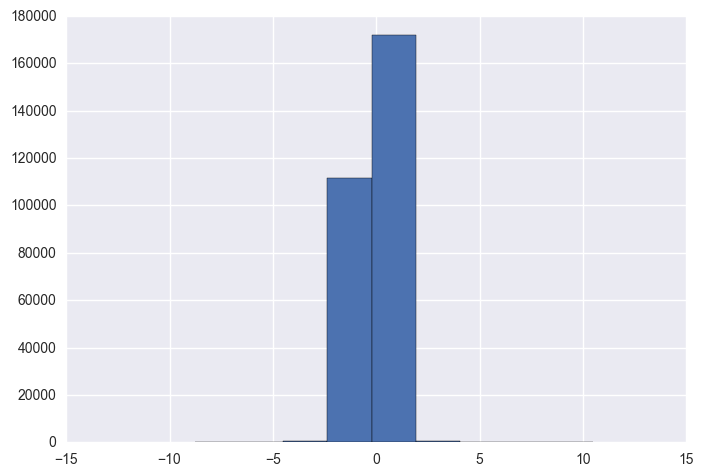

In [73]:
#Below is the histogram describing the distribution of the V22 variable.
df.V22.hist()

#EDA for V23 variable

In [74]:
df.V23.value_counts()

 0.140304    77
 0.020675    77
 0.354198    62
-0.072991    60
 0.363485    53
-0.036584    48
-0.118598    45
-0.092549    40
-0.114069    39
-0.331600    36
 0.103797    36
 0.010535    35
 0.380780    30
-0.027337    28
 0.095279    27
 0.158595    27
 0.001930    26
 0.175069    25
-0.120082    25
 0.275421    24
-0.203189    24
 0.034227    24
-0.070785    23
-0.002477    23
-0.159336    21
-0.040503    21
-0.006577    21
-0.006851    21
 0.381740    20
 0.124776    19
             ..
-0.372160     1
 0.207744     1
 0.015907     1
-0.186742     1
-0.298029     1
-2.041756     1
 0.103200     1
 0.094968     1
 0.020534     1
 0.219452     1
-0.016497     1
 0.209755     1
 0.469026     1
-0.128127     1
-0.142998     1
-0.549994     1
 0.187745     1
 0.140639     1
-0.017609     1
 0.519911     1
-0.028597     1
 0.038885     1
 0.329035     1
 0.014065     1
 0.166253     1
-0.137263     1
 0.108724     1
 0.073871     1
 0.070855     1
-0.068269     1
Name: V23, dtype: int64

In [75]:
df[df.V23.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


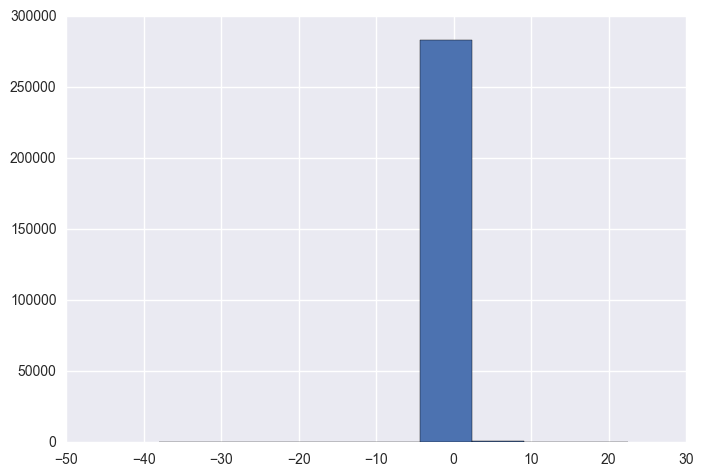

In [76]:
#Below is the histogram describing the distribution of the V23 variable.
df.V23.hist()

#EDA for V24 variable

In [77]:
df.V24.value_counts()

 0.357827    77
 0.726212    77
 0.620709    62
 1.018136    60
 0.604827    53
 0.529693    48
 0.891480    45
-1.345664    40
 0.915936    39
 1.009952    36
 0.992126    36
 0.784185    35
 0.698235    30
-0.708803    28
 0.726621    27
 0.946121    27
 0.981586    26
-1.647141    25
 1.009497    25
-0.282172    24
 0.149377    24
-0.041433    24
 0.981843    23
 0.957666    23
 1.039655    21
 0.857135    21
 0.483865    21
 1.001063    21
 0.698179    20
 1.049895    19
             ..
 0.417396     1
 0.116552     1
 0.054871     1
 0.138580     1
 0.646800     1
 0.433998     1
 0.661842     1
-0.081580     1
 0.481730     1
 1.030610     1
-0.928120     1
-0.049125     1
 0.221953     1
 0.747855     1
 0.450864     1
 0.175915     1
 0.012566     1
 0.032674     1
-0.296688     1
 0.377385     1
-0.231884     1
 0.006933     1
 1.149086     1
 0.914214     1
-0.833810     1
-1.086612     1
 0.090353     1
-0.268729     1
-0.004172     1
-0.095279     1
Name: V24, dtype: int64

In [78]:
df[df.V24.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


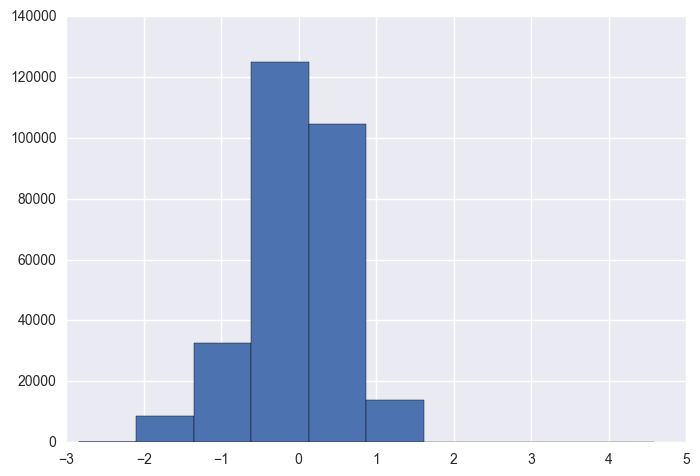

In [79]:
#Below is the histogram describing the distribution of the V24 variable.
df.V24.hist()

#EDA for V25 variable

In [80]:
df.V25.value_counts()

 0.366624    77
 0.186423    77
-0.297138    62
 0.663575    60
-0.264560    53
 0.414685    48
 0.730240    45
 0.510305    40
 0.730073    39
 0.369398    36
 0.233730    36
 0.412944    35
-0.265199    30
 0.393032    28
-0.060118    27
 0.369713    27
 0.549879    26
-0.286040    25
 0.895922    25
 0.061452    24
-0.586655    24
 0.785278    24
 0.636471    23
 0.548044    23
 0.573693    21
 0.291348    21
 0.850055    21
 0.413009    21
-0.264798    20
 1.012236    19
             ..
 0.025084     1
-0.392758     1
 0.092587     1
-0.343929     1
 0.259842     1
-0.809282     1
-0.977138     1
-0.221584     1
-0.184486     1
 0.055997     1
 0.080970     1
 0.263215     1
-0.233893     1
-0.104247     1
-0.010591     1
-0.470320     1
 0.440327     1
 0.710937     1
 0.068706     1
-1.612884     1
-0.807911     1
-0.190529     1
-0.328573     1
 0.107977     1
-0.454972     1
 0.598594     1
 0.021184     1
 0.269021     1
-0.269034     1
 0.116721     1
Name: V25, dtype: int64

In [81]:
df[df.V25.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


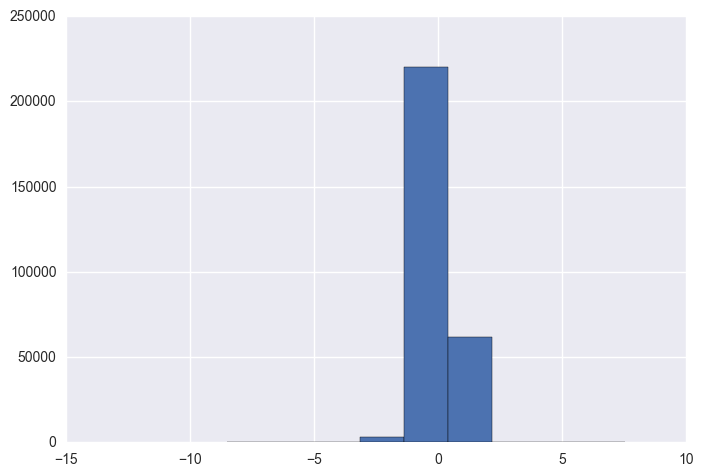

In [82]:
#Below is the histogram describing the distribution of the V25 variable.
df.V25.hist()

#EDA for V26 variable

In [83]:
df.V26.value_counts()

 0.096544    77
-0.398828    77
 0.166736    62
-0.671323    60
 0.219671    53
 0.735870    48
 0.384013    45
-0.182674    40
 0.383879    39
 0.110374    36
-0.824471    36
 0.734475    35
 0.219159    30
-0.231545    28
 0.110626    27
-0.192346    27
-0.190893    26
 0.021527    25
-0.325840    25
-0.045673    24
-0.284958    24
 0.073725    24
-0.191426    23
-0.711079    23
-0.393611    21
-0.079400    21
-0.311685    21
 0.331772    21
 0.219275    20
 0.247256    19
             ..
 0.253224     1
 0.587234     1
 0.093322     1
 0.876290     1
-0.609950     1
-0.785918     1
-0.168293     1
-0.835944     1
-0.044382     1
-0.714927     1
 0.069965     1
 0.928325     1
-0.375726     1
 0.515073     1
-0.546706     1
-0.700794     1
-0.345788     1
-0.107389     1
-0.031130     1
 0.048377     1
-0.078836     1
-0.374557     1
 0.050489     1
 0.144671     1
-0.503533     1
 0.140862     1
 0.164534     1
-0.726982     1
 0.659149     1
-0.464437     1
Name: V26, dtype: int64

In [84]:
df[df.V26.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


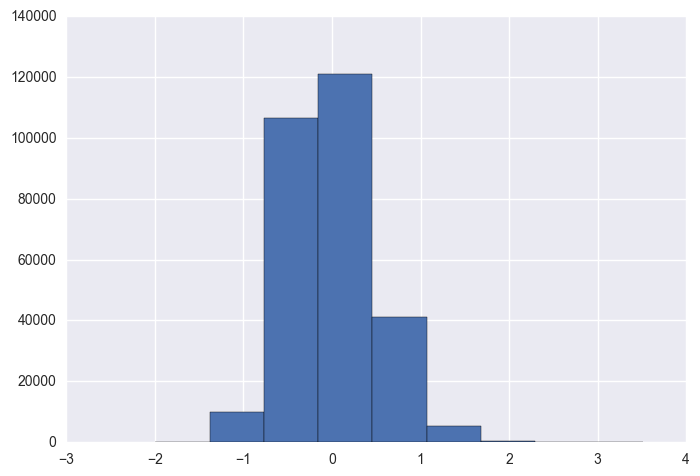

In [85]:
#Below is the histogram describing the distribution of the V26 variable.
df.V26.hist()

#EDA for V27 variable

In [86]:
df.V27.value_counts()

 0.027735    77
-0.035866    77
-0.068299    62
 0.096801    60
-0.039209    53
-0.058233    48
-0.028465    45
 0.107058    40
-0.031902    39
 0.241305    36
-0.028302    36
-0.093999    35
-0.052337    30
 0.011633    28
 0.060914    27
-0.021837    27
 0.033277    26
 0.002425    25
 0.026738    25
 0.058399    24
 0.024623    24
 0.041143    24
 0.068018    23
 0.032333    23
 0.037536    21
 0.038571    21
 0.074648    21
 0.018791    21
-0.052131    20
 0.041260    19
             ..
-0.008598     1
-0.244677     1
-0.054187     1
 0.012247     1
-0.124407     1
 0.004614     1
-0.331870     1
 0.060408     1
-0.045390     1
-0.061756     1
-0.075852     1
 0.328682     1
-0.085495     1
-0.433580     1
-0.120427     1
 0.028326     1
-0.067244     1
-0.009417     1
 0.001456     1
-0.036083     1
-0.043314     1
 0.216949     1
-0.326127     1
 0.031861     1
-0.105433     1
 0.086200     1
 0.233316     1
 0.068123     1
-0.011172     1
-0.710319     1
Name: V27, dtype: int64

In [87]:
df[df.V27.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


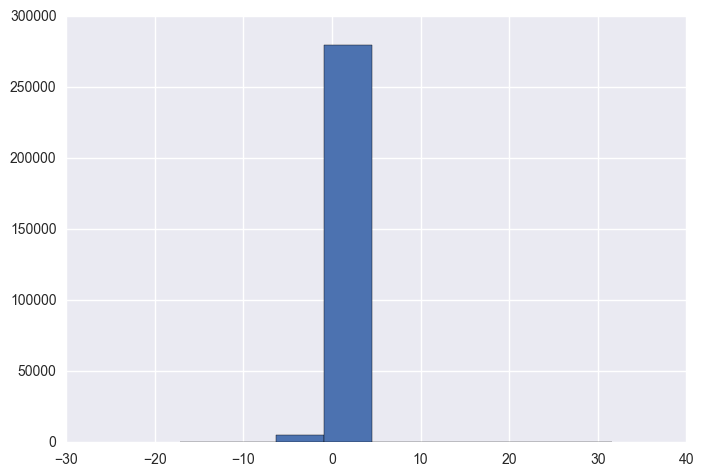

In [88]:
#Below is the histogram describing the distribution of the V27 variable.
df.V27.hist()

#EDA for V28 variable

In [89]:
df.V28.value_counts()

-0.060282    77
 0.018495    77
-0.029585    62
 0.028697    60
-0.042787    53
-0.026658    48
 0.036123    45
 0.071818    40
 0.029849    39
-0.020359    36
 0.011836    36
-0.091945    35
-0.066750    30
 0.005579    28
-0.042846    27
 0.023638    27
 0.013703    26
-0.076125    25
 0.011169    25
 0.023365    24
 0.085436    24
-0.027230    24
 0.024173    23
 0.014574    23
 0.020935    21
 0.050618    21
 0.001003    21
 0.031567    21
-0.066940    20
 0.020956    19
             ..
-0.187892     1
-0.105514     1
 0.031644     1
-0.002845     1
 0.018907     1
 0.188809     1
 0.334677     1
 0.040476     1
 0.000839     1
 0.019121     1
-0.297816     1
 0.047584     1
-0.178555     1
 0.260387     1
 0.032101     1
 0.155392     1
-0.025824     1
-0.022718     1
 0.019567     1
 0.005337     1
 0.028812     1
 0.051934     1
 0.072527     1
-0.009639     1
 0.171771     1
 0.017058     1
-0.232322     1
 0.086657     1
 0.089980     1
-0.164564     1
Name: V28, dtype: int64

In [90]:
df[df.V28.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


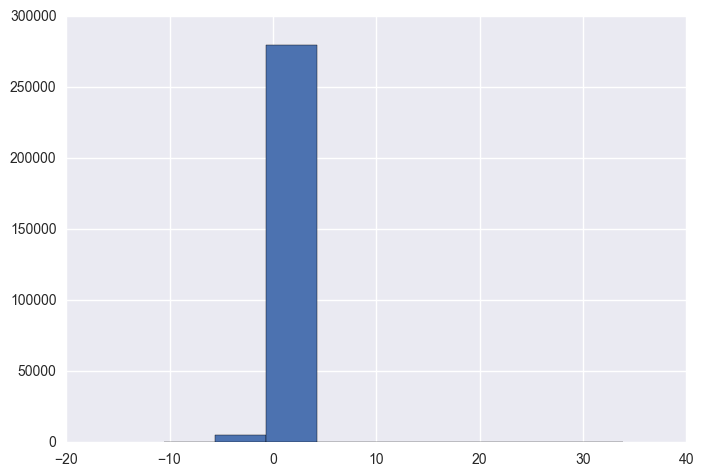

In [91]:
#Below is the histogram describing the distribution of the V28 variable.
df.V28.hist()

#EDA for Amount variable

In [92]:
df.Amount.value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
0.76        2998
10.00       2950
1.29        2892
1.79        2623
0.99        2304
20.00       2002
0.00        1825
8.99        1811
11.50       1741
4.49        1579
5.00        1569
0.77        1443
2.69        1436
25.00       1388
50.00       1341
4.99        1242
2.00        1091
30.00       1012
29.99        975
45.00        949
12.99        941
40.00        912
19.99        897
19.95        878
100.00       877
           ...  
116.54         1
247.24         1
497.88         1
298.73         1
184.54         1
227.30         1
247.33         1
154.12         1
229.63         1
192.14         1
114.23         1
251.44         1
382.24         1
506.90         1
38.81          1
97.77          1
255.19         1
138.96         1
373.23         1
1152.41        1
1169.92        1
1139.24        1
171.14         1
189.02         1
271.90         1
285.32         1
294.01         1
288.05        

In [93]:
df[df.Amount.isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


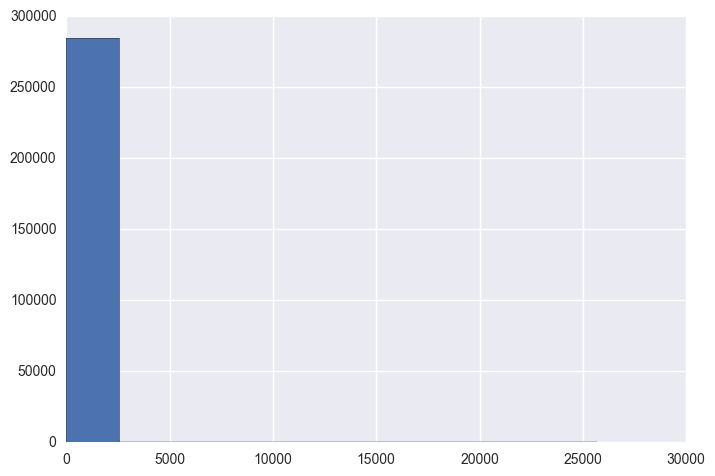

In [94]:
df.Amount.hist()

In [95]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

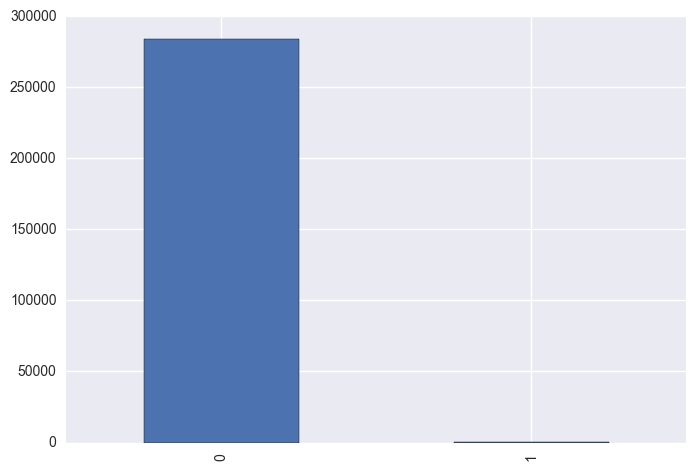

In [96]:
df.Class.value_counts().plot(kind='bar')

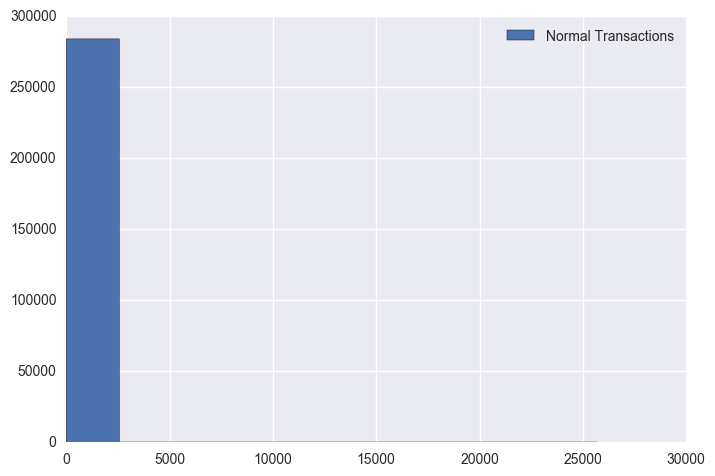

In [97]:
sns.plt.hist(data=df[df['Class']==0],x='Amount',label='Normal Transactions')
plt.legend(loc='best')

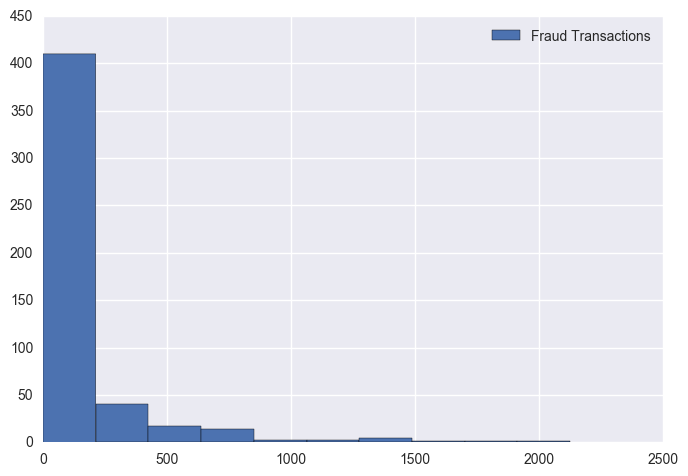

In [98]:
sns.plt.hist(data=df[df['Class']==1],x='Amount',label='Fraud Transactions')
plt.legend(loc='best')

In [99]:
df[df.Class == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [100]:
df1=df.pop("Class")

In [101]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [102]:
df1

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

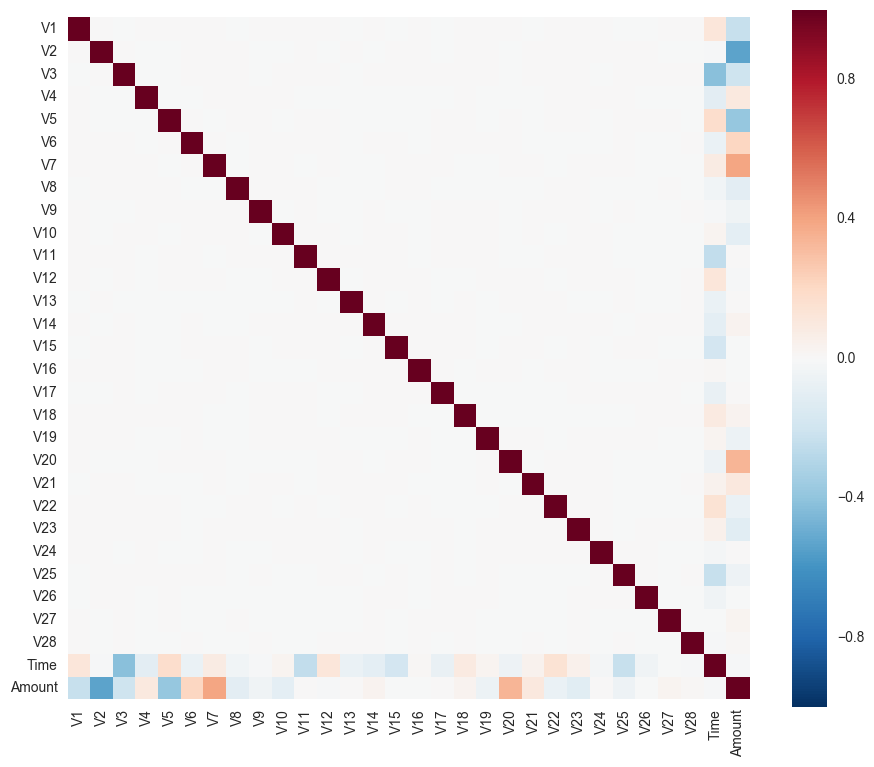

In [103]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']

# Compute the correlation matrix
corr = df[columns].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,square=True,ax=ax,vmax=1)

In [104]:
#Dropping the unwanted columns
df = df.drop(['Time'], axis=1)

In [105]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [106]:
#Creating train and test split
X_train, X_test, y_train, y_test = train_test_split(df, df1, test_size=.2, random_state=42)

In [107]:
### Using Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [108]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [109]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
best_rfc = estimator.best_estimator_

# Accuracy

In [111]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.999578666479


In [112]:
y_hat = best_rfc.predict(X_test)

In [113]:
y_hat

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
101565    0
260880    0
214337    0
201575    0
81055     0
134976    0
237701    0
256836    0
97650     0
158290    0
246697    0
68279     0
267585    0
26525     0
74422     0
206357    0
257395    0
283656    0
231156    0
38442     0
225485    0
92410     0
10828     0
61461     0
134354    0
         ..
97068     0
127928    0
254929    0
203745    0
189799    0
2085      0
15725     0
243506    0
250359    0
49049     0
153683    0
97271     0
171952    0
255048    0
176498    0
145799    0
183815    0
48060     0
163478    0
151081    0
132236    0
83248     0
135640    0
70136     0
235173    0
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, dtype: int64

In [115]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.999578666479


In [116]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.97      0.78      0.86        98

avg / total       1.00      1.00      1.00     56962



In [117]:
matrix= confusion_matrix(y_test, best_rfc.predict(X_test))
print matrix
#Calculating Precision and Recall based on the number of true positives, false positives and false negatives
tp = matrix[1][1]
fp = matrix[0][1]
fn = matrix[1][0]
print "Precision: ", tp  / float(tp + fp)
print "Recall: ", tp  / float(tp + fn)

[[56862     2]
 [   22    76]]
Precision:  0.974358974359
Recall:  0.775510204082


In [118]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.966900528149
